In [1]:
# Data Management & Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import geopandas as gpd
import folium
import folium.plugins as plugins
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots

# Utils
import math
from datetime import datetime, timedelta
import ipywidgets as widgets
import random
import warnings
from IPython.display import display, HTML
from ipywidgets import interact, interact_manual
from time import sleep
%matplotlib inline
sns.set_style('white')
sns.set_color_codes()
plt.style.use('default')  # sub 'dark_background'
warnings.filterwarnings("ignore")


# Modeling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
patients_df = pd.read_csv('./uc_past_patients.csv', index_col='pt_id')
patients_df.head()

,pt_name,pt_dob,pt_age,visit_location,visit_reason,visit_code,visit_date,visit_day,checkin_time,checkout_time,rolling_ct,rolling_code,num_techs,datetime,needed_techs
pt_id,,,,,,,,,,,,,,,
1000004,Christopher Clark Jr.,2002-10-06,19,denver,covid-test,4,2021-05-01,Saturday,09:43:13,10:06:13,1,0.0,4,2021-05-01 09:43:13,1
1000028,Troy King,1983-08-07,38,denver,UTI,4,2021-05-01,Saturday,09:52:44,11:18:44,2,4.0,4,2021-05-01 09:52:44,1
1000030,Daisy Lee,2009-10-06,12,denver,vaccination,3,2021-05-01,Saturday,09:53:04,10:57:04,3,4.0,4,2021-05-01 09:53:04,1
1000023,Christopher Wright,1997-05-15,24,denver,drug-test,3,2021-05-01,Saturday,10:14:08,11:11:08,3,3.5,4,2021-05-01 10:14:08,1
1000006,Darius Barnes,2013-02-16,9,denver,vaccination,3,2021-05-01,Saturday,10:17:56,11:07:56,3,3.5,4,2021-05-01 10:17:56,1


In [3]:
type(patients_df.checkin_time.tolist()[0])

str

In [4]:
patients_df['needed_techs'] = patients_df['rolling_ct'].apply(lambda x: math.ceil(x/3))
patients_df.head(20)

,pt_name,pt_dob,pt_age,visit_location,visit_reason,visit_code,visit_date,visit_day,checkin_time,checkout_time,rolling_ct,rolling_code,num_techs,datetime,needed_techs
pt_id,,,,,,,,,,,,,,,
1000004,Christopher Clark Jr.,2002-10-06,19,denver,covid-test,4,2021-05-01,Saturday,09:43:13,10:06:13,1,0.0,4,2021-05-01 09:43:13,1
1000028,Troy King,1983-08-07,38,denver,UTI,4,2021-05-01,Saturday,09:52:44,11:18:44,2,4.0,4,2021-05-01 09:52:44,1
1000030,Daisy Lee,2009-10-06,12,denver,vaccination,3,2021-05-01,Saturday,09:53:04,10:57:04,3,4.0,4,2021-05-01 09:53:04,1
1000023,Christopher Wright,1997-05-15,24,denver,drug-test,3,2021-05-01,Saturday,10:14:08,11:11:08,3,3.5,4,2021-05-01 10:14:08,1
1000006,Darius Barnes,2013-02-16,9,denver,vaccination,3,2021-05-01,Saturday,10:17:56,11:07:56,3,3.5,4,2021-05-01 10:17:56,1
1000041,Katie Decker,1993-12-09,28,denver,stomach-pain,5,2021-05-01,Saturday,10:23:25,11:59:25,4,3.3,4,2021-05-01 10:23:25,2
1000012,Jennifer Smith,1980-09-09,41,denver,sore-throat,4,2021-05-01,Saturday,10:30:45,11:41:45,5,3.8,4,2021-05-01 10:30:45,2
1000024,Dawn Jackson,2005-09-09,16,denver,UTI,4,2021-05-01,Saturday,10:42:33,12:09:33,3,4.5,4,2021-05-01 10:42:33,1
1000018,Jerome Hall,2004-08-26,17,denver,covid-test,4,2021-05-01,Saturday,10:46:29,11:53:29,4,4.3,4,2021-05-01 10:46:29,2


In [5]:
denver_df = patients_df[(patients_df.visit_location == 'denver') & (patients_df.visit_date == '2021-05-01')]
lakewood_df = patients_df[(patients_df.visit_location == 'lakewood') & (patients_df.visit_date == '2021-05-01')]

zip_denver = []
zip_lakewood = []

for i in zip(denver_df.num_techs, denver_df.needed_techs):
    zip_denver.append(i)

for i in zip(lakewood_df.num_techs, lakewood_df.needed_techs):
    zip_lakewood.append(i)

    
status = []

for i in range(len(zip_denver)):
    print(i, zip_denver[i])
    if zip_denver[i][0] == zip_denver[i][1] & zip_denver[i-1][0] == zip_denver[i-1][1]:
        print('sos')

0 (4, 1)
1 (4, 1)
2 (4, 1)
3 (4, 1)
4 (4, 1)
5 (4, 2)
6 (4, 2)
7 (4, 1)
8 (4, 2)
9 (4, 2)
10 (4, 2)
11 (4, 2)
12 (4, 2)
13 (4, 2)
14 (4, 2)
15 (4, 2)
16 (4, 1)
17 (4, 2)
18 (4, 2)
19 (4, 2)
20 (4, 2)
21 (4, 2)
22 (4, 2)
23 (4, 2)
24 (4, 2)
25 (4, 2)
26 (4, 2)
27 (4, 2)
28 (4, 2)
29 (4, 2)
30 (4, 2)
31 (4, 2)
32 (4, 2)
33 (4, 2)
34 (4, 2)
35 (4, 2)
36 (4, 3)
37 (4, 1)
38 (4, 2)
39 (4, 2)
40 (4, 2)
41 (4, 2)
42 (4, 2)
43 (4, 3)
44 (4, 3)
45 (4, 3)
46 (4, 4)
47 (4, 4)
sos
48 (4, 4)
sos
49 (4, 4)
sos
50 (4, 4)
sos
51 (4, 3)
52 (4, 1)
53 (4, 2)
54 (4, 2)
55 (4, 2)
56 (4, 2)
57 (4, 2)
58 (4, 2)
59 (4, 2)
60 (4, 2)
61 (4, 2)
62 (4, 2)
63 (4, 3)
64 (4, 3)
65 (4, 3)
66 (4, 2)
67 (4, 2)
68 (4, 2)
69 (4, 2)
70 (4, 1)
71 (4, 1)


In [6]:
for i in range(len(zip_lakewood)):
    print(i, zip_lakewood[i])
    if zip_lakewood[i][0] == zip_lakewood[i][1] & zip_lakewood[i-1][0] == zip_lakewood[i-1][1]:
        print('sos')

0 (6, 1)
1 (6, 1)
2 (6, 1)
3 (6, 2)
4 (6, 2)
5 (6, 2)
6 (6, 2)
7 (6, 3)
8 (6, 3)
9 (6, 3)
10 (6, 4)
11 (6, 4)
12 (6, 4)
13 (6, 5)
14 (6, 5)
15 (6, 5)
16 (6, 5)
17 (6, 5)
18 (6, 3)
19 (6, 3)
20 (6, 3)
21 (6, 4)
22 (6, 3)
23 (6, 4)
24 (6, 1)
25 (6, 1)
26 (6, 1)
27 (6, 1)
28 (6, 1)
29 (6, 1)
30 (6, 1)
31 (6, 2)
32 (6, 2)
33 (6, 1)
34 (6, 2)
35 (6, 2)
36 (6, 2)
37 (6, 3)
38 (6, 3)
39 (6, 3)
40 (6, 2)
41 (6, 3)
42 (6, 3)
43 (6, 3)
44 (6, 3)
45 (6, 4)
46 (6, 4)
47 (6, 2)
48 (6, 1)
49 (6, 1)
50 (6, 1)
51 (6, 1)
52 (6, 2)
53 (6, 2)
54 (6, 2)
55 (6, 2)
56 (6, 2)
57 (6, 2)
58 (6, 2)
59 (6, 2)
60 (6, 2)
61 (6, 1)
62 (6, 1)
63 (6, 1)
64 (6, 1)
65 (6, 2)
66 (6, 2)
67 (6, 2)
68 (6, 2)
69 (6, 2)
70 (6, 1)
71 (6, 2)
72 (6, 2)
73 (6, 2)


In [7]:
patients_df.visit_location.unique()

array(['denver', 'edgewater', 'wheatridge', 'rino', 'lakewood'],
      dtype=object)

In [8]:
def make_predictions(df):
    model_df = df[['visit_date', 'visit_day', 'rolling_code', 'rolling_ct']].copy()
    model_df = model_df.groupby(['visit_date', 'visit_day']).max()[['rolling_code', 'rolling_ct']].reset_index(drop=False) \
    .rename(columns={'rolling_ct':'peak_ct', 'visit_date':'visit_month', 'rolling_code':'peak_avg_code'})

    # display(model_df)

    model_df['visit_month'] = model_df.visit_month.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
    model_df.peak_avg_code.hist()
    # Scaler
    scaler = MinMaxScaler()
    model_df['peak_avg_code_s'] = scaler.fit_transform(model_df[['peak_avg_code']])
    model_df = model_df[['visit_month', 'visit_day', 'peak_avg_code_s', 'peak_ct']]
    # Change dtype
    model_df['visit_month'] = model_df.visit_month.astype('category')
    # Make dummies
    dummies = pd.get_dummies(model_df[['visit_month', 'visit_day']])
    # Set up for partitioning
    X = pd.concat([dummies, model_df['peak_avg_code_s'].copy()], axis=1)
    y = model_df.peak_ct.copy()
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    rf_train_pred = rf.predict(X_train)
    rf_test_pred = rf.predict(X_test)

    rf_train_mse = mean_squared_error(y_train, rf_train_pred)
    # print('train:', np.sqrt(rf_train_mse))

    rf_test_mse = mean_squared_error(y_test, rf_test_pred)
    rmse = np.sqrt(rf_test_mse)

    df = X_test.copy()
    df['pred'] = rf_test_pred
    df['actual'] = y_test
    
    return (df, ('rmse', rmse))



In [9]:
denver_df = patients_df[patients_df.visit_location == 'denver']
edgewater_df = patients_df[patients_df.visit_location == 'edgewater']
wheatridge_df = patients_df[patients_df.visit_location == 'wheatridge']
rino_df = patients_df[patients_df.visit_location == 'rino']
lakewood_df = patients_df[patients_df.visit_location == 'lakewood']


In [10]:
t = patients_df[patients_df.visit_location=='lakewood'].groupby(['visit_location', 'visit_date', 'visit_day']).max().reset_index(drop=False)
t[ (t.visit_date.str.contains('2022-03')) & (t.visit_day == 'Sunday')]['rolling_ct'].mean()

13.25

('rmse', 2.3328747901936127)


,visit_month_1,visit_month_2,visit_month_3,visit_month_4,visit_month_5,visit_month_6,visit_month_7,visit_month_8,visit_month_9,visit_month_10,...,visit_day_Friday,visit_day_Monday,visit_day_Saturday,visit_day_Sunday,visit_day_Thursday,visit_day_Tuesday,visit_day_Wednesday,peak_avg_code_s,pred,actual
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1.0,10.435167,10
33,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1.0,10.157774,12
15,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1.0,11.131500,11
309,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1.0,15.224881,11
57,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1.0,11.619651,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.5,10.546714,10
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1.0,11.466667,13
360,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.0,11.178333,12
209,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.0,10.362000,14


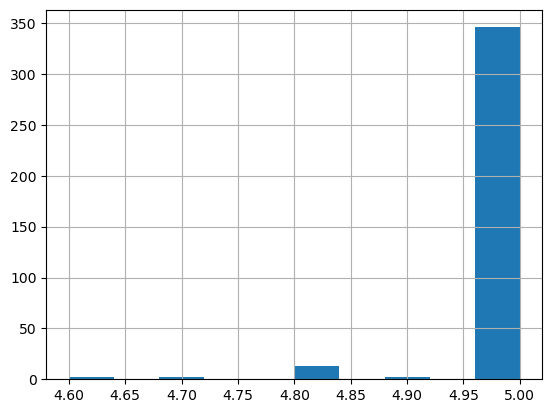

In [11]:
df, rmse = make_predictions(lakewood_df)
print(rmse)
df

,visit_location,visit_month,visit_day,peak_avg_code,peak_ct
0,denver,2021-05-01,Saturday,5.0,11
1,denver,2021-05-02,Sunday,5.0,14
2,denver,2021-05-03,Monday,5.0,9
3,denver,2021-05-04,Tuesday,5.0,16
4,denver,2021-05-05,Wednesday,5.0,12
...,...,...,...,...,...
1820,wheatridge,2022-04-26,Tuesday,5.0,12
1821,wheatridge,2022-04-27,Wednesday,5.0,14
1822,wheatridge,2022-04-28,Thursday,5.0,9
1823,wheatridge,2022-04-29,Friday,5.0,12


<AxesSubplot:>

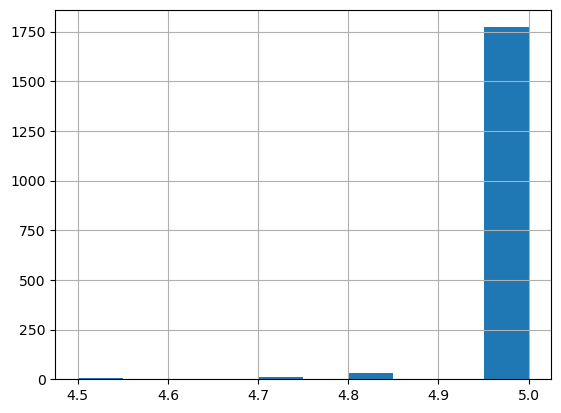

In [12]:
model_df = patients_df[['visit_location', 'visit_date', 'visit_day', 'rolling_code', 'rolling_ct']].copy()
model_df = model_df.groupby(['visit_location', 'visit_date', 'visit_day']).max()[['rolling_code', 'rolling_ct']].reset_index(drop=False) \
    .rename(columns={'rolling_ct':'peak_ct', 'visit_date':'visit_month', 'rolling_code':'peak_avg_code'})

display(model_df)

model_df['visit_month'] = model_df.visit_month.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
model_df.peak_avg_code.hist()

In [13]:
scaler = MinMaxScaler()
model_df['peak_avg_code_s'] = scaler.fit_transform(model_df[['peak_avg_code']])
model_df = model_df[['visit_location', 'visit_month', 'visit_day', 'peak_avg_code_s', 'peak_ct']]
model_df

,visit_location,visit_month,visit_day,peak_avg_code_s,peak_ct
0,denver,5,Saturday,1.0,11
1,denver,5,Sunday,1.0,14
2,denver,5,Monday,1.0,9
3,denver,5,Tuesday,1.0,16
4,denver,5,Wednesday,1.0,12
...,...,...,...,...,...
1820,wheatridge,4,Tuesday,1.0,12
1821,wheatridge,4,Wednesday,1.0,14
1822,wheatridge,4,Thursday,1.0,9
1823,wheatridge,4,Friday,1.0,12


In [14]:
model_df.dtypes

visit_location      object
visit_month          int64
visit_day           object
peak_avg_code_s    float64
peak_ct              int64
dtype: object

In [15]:
model_df['visit_month'] = model_df.visit_month.astype('category')

In [16]:
dummies = pd.get_dummies(model_df[['visit_location', 'visit_month', 'visit_day']])
dummies

,visit_location_denver,visit_location_edgewater,visit_location_lakewood,visit_location_rino,visit_location_wheatridge,visit_month_1,visit_month_2,visit_month_3,visit_month_4,visit_month_5,...,visit_month_10,visit_month_11,visit_month_12,visit_day_Friday,visit_day_Monday,visit_day_Saturday,visit_day_Sunday,visit_day_Thursday,visit_day_Tuesday,visit_day_Wednesday
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1821,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1822,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1823,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
# Set up for partitioning
X = pd.concat([dummies, model_df['peak_avg_code_s'].copy()], axis=1)
y = model_df.peak_ct.copy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_pred = lr.predict(X_train)
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
np.sqrt(lr_train_mse)

2.0722141062310477

In [20]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

rf_train_mse = mean_squared_error(y_train, rf_train_pred)
print('train:', np.sqrt(rf_train_mse))

rf_test_mse = mean_squared_error(y_test, rf_test_pred)
np.sqrt(rf_test_mse)

train: 1.7133952755088788


2.295554416368306

In [21]:
X_test

,visit_location_denver,visit_location_edgewater,visit_location_lakewood,visit_location_rino,visit_location_wheatridge,visit_month_1,visit_month_2,visit_month_3,visit_month_4,visit_month_5,...,visit_month_11,visit_month_12,visit_day_Friday,visit_day_Monday,visit_day_Saturday,visit_day_Sunday,visit_day_Thursday,visit_day_Tuesday,visit_day_Wednesday,peak_avg_code_s
555,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1.0
1744,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
297,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
733,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.0
910,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.6
1214,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
1029,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
1468,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1.0


In [22]:
 pd.DataFrame(rf_test_pred)

,0
0,7.679139
1,10.840667
2,12.912833
3,9.098333
4,11.592952
...,...
543,9.362333
544,11.542333
545,11.267111
546,9.673861


In [23]:
test = X_test.copy()
test['pred'] = rf_test_pred
test

,visit_location_denver,visit_location_edgewater,visit_location_lakewood,visit_location_rino,visit_location_wheatridge,visit_month_1,visit_month_2,visit_month_3,visit_month_4,visit_month_5,...,visit_month_12,visit_day_Friday,visit_day_Monday,visit_day_Saturday,visit_day_Sunday,visit_day_Thursday,visit_day_Tuesday,visit_day_Wednesday,peak_avg_code_s,pred
555,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.0,7.679139
1744,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1.0,10.840667
297,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1.0,12.912833
733,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1.0,9.098333
910,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1.0,11.592952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.6,9.362333
1214,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1.0,11.542333
1029,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1.0,11.267111
1468,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1.0,9.673861


In [24]:
patients_df

,pt_name,pt_dob,pt_age,visit_location,visit_reason,visit_code,visit_date,visit_day,checkin_time,checkout_time,rolling_ct,rolling_code,num_techs,datetime,needed_techs
pt_id,,,,,,,,,,,,,,,
1000004,Christopher Clark Jr.,2002-10-06,19,denver,covid-test,4,2021-05-01,Saturday,09:43:13,10:06:13,1,0.0,4,2021-05-01 09:43:13,1
1000028,Troy King,1983-08-07,38,denver,UTI,4,2021-05-01,Saturday,09:52:44,11:18:44,2,4.0,4,2021-05-01 09:52:44,1
1000030,Daisy Lee,2009-10-06,12,denver,vaccination,3,2021-05-01,Saturday,09:53:04,10:57:04,3,4.0,4,2021-05-01 09:53:04,1
1000023,Christopher Wright,1997-05-15,24,denver,drug-test,3,2021-05-01,Saturday,10:14:08,11:11:08,3,3.5,4,2021-05-01 10:14:08,1
1000006,Darius Barnes,2013-02-16,9,denver,vaccination,3,2021-05-01,Saturday,10:17:56,11:07:56,3,3.5,4,2021-05-01 10:17:56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023081,Diana Larson,2007-01-14,15,lakewood,stomach-pain,5,2022-04-30,Saturday,19:33:47,21:14:47,8,4.4,4,2022-04-30 19:33:47,3
5023090,Cody Glenn,1971-01-31,51,lakewood,headache,5,2022-04-30,Saturday,19:40:57,21:10:57,7,4.5,4,2022-04-30 19:40:57,3
5023088,Toni Martinez,1989-06-03,32,lakewood,cough,4,2022-04-30,Saturday,19:43:01,20:59:01,8,4.6,4,2022-04-30 19:43:01,3
